# pandas
- 마이크로소프트 액셀과 유사한 데이터프레임(DataFrame)을 사용하기 위해 필요
- 데이터프레임은 데이터 처리와 분석에 가장 많이 사용되는 2차원 데이터 구조체
- 1차원 데이터 구조체로는 리스트가 널리 사용된다

## 데이터 프레임 만들기
- 딕셔너리를 만든 후 이를 데이터프레임으로 바꾸는 방법
- csv 파일을 읽어 만드는 방법
- 액셀 파일을 읽어 만드는 방법
- 배열, 리스트, 튜플로부터 만드는 방법

In [70]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [69]:
# 딕셔너리에서 만드는 방법

x = {'city': ['서울', '부산', '대구', '대전', '광주'],
        'population': [990, 350, 250, 154, 150],
        'temp': [13, 16, 14, 13, 15]}

data = pd.DataFrame(x)
data

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


- 딕셔너리의 키를 컬럼명으로, 값을 데이터로 사용한다
- 인덱스(행 번호)가 자동으로 만들어진다

In [45]:
# 데이터프레임의 구조 보기(shape)
data.shape

(5, 3)

In [46]:
# 샘플(행) 수  - 튜플의 첫번째 값을 본다
data.shape[0]

5

In [47]:
# 컬럼(열) 수 - 튜플의 두번째 값을 본다
data.shape[1]

3

In [48]:
# 컬럼명 모두 보기 (컬럼명은 특수 변수 Index로 표현된다)
data.columns

Index(['city', 'population', 'temp'], dtype='object')

In [49]:
# 일부 컬럼만 보기
data[['city', 'temp']]

,city,temp
0,서울,13
1,부산,16
2,대구,14
3,대전,13
4,광주,15


- 원본 데이터는 바뀌지 않는다

In [50]:
data

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


In [51]:
# 별도 저장이 필요하면 새로운 변수에 저장한다
data_part = data[['city', 'temp']]
data_part

,city,temp
0,서울,13
1,부산,16
2,대구,14
3,대전,13
4,광주,15


- 한 컬럼만 얻기
- 컬럼이 하나인 데이터프레임은 시리즈(Series)라고 한다
 - 시리즈에도 인덱스가 붙어있다

In [52]:
data["temp"]

0    13
1    16
2    14
3    13
4    15
Name: temp, dtype: int64

In [53]:
y = data.temp
type(y)
y

0    13
1    16
2    14
3    13
4    15
Name: temp, dtype: int64

In [54]:
# 컬럼(열) 순서 바꾸어 보기 (view)
data[['city', 'temp', 'population']]

,city,temp,population
0,서울,13,990
1,부산,16,350
2,대구,14,250
3,대전,13,154
4,광주,15,150


In [55]:
data

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


### 객체 사본 만들기
- 복사본을 만들려면 copy()를 사용해야 한다
- 복사본으로 이후 작업을 수행하고 원본은 보호하기 위해서

In [56]:
# 사본 만들기
df = data.copy()

In [57]:
# copy()를 사용하면 별도의 데이터셋이 만들어진다
x = [1,2,3,4]
y = x
y

[1, 2, 3, 4]

In [58]:
x.append(5)
x

[1, 2, 3, 4, 5]

In [59]:
y

[1, 2, 3, 4, 5]

## 인덱스
- 인덱스는 행에 대한 접근을 쉽게 하기 위해 사용한다

In [60]:
df

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


In [61]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [62]:
# 인덱스를 컬럼에서 선택하기
df.set_index('city')

,population,temp
city,,
서울,990,13
부산,350,16
대구,250,14
대전,154,13
광주,150,15


- 원본 데이터는 바뀌지 않는다
- 파이썬의 데이터 복사 최소화 원칙

In [63]:
df

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


- 수행 결과를 원본 데이터에 반영하려면 inplace=True 사용

In [64]:
df.set_index('city', inplace=True)
df

,population,temp
city,,
서울,990,13
부산,350,16
대구,250,14
대전,154,13
광주,150,15


In [65]:
df.population.idxmax(), df.population.idxmin()

('서울', '광주')

In [71]:
# 한글 설정
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

<AxesSubplot:xlabel='city'>

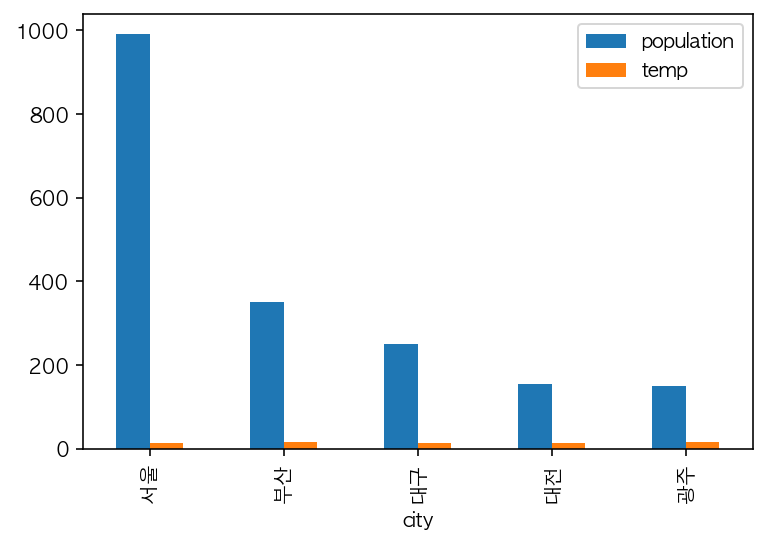

In [72]:
df.plot(kind='bar')

### 인데스 원상복귀
- reset_index 사용

In [22]:
df.reset_index(inplace=True)
df

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


## 컬럼 이름 바꾸기
- columns 사용

In [23]:
df

,city,population,temp
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


In [24]:
df.columns = ['도시','인구','날씨'] # 즉시 반영된다
df

,도시,인구,날씨
0,서울,990,13
1,부산,350,16
2,대구,250,14
3,대전,154,13
4,광주,150,15


## 샘플 추가
- 데이터프레임 합치기 (보통 행 방향으로 합친다-샘플 추가)
- 판다스의  concat() 사용

In [25]:
x2 = {'city': ['인천', '울산'],
        'population': [290, 120],
        'temp': [12.7, 15.5]}
df2 = pd.DataFrame(x2)
df2

,city,population,temp
0,인천,290,12.7
1,울산,120,15.5


In [26]:
df2.columns = ['도시','인구','날씨'] 
df2

,도시,인구,날씨
0,인천,290,12.7
1,울산,120,15.5


In [27]:
pd.concat([df, df2])

,도시,인구,날씨
0,서울,990,13.0
1,부산,350,16.0
2,대구,250,14.0
3,대전,154,13.0
4,광주,150,15.0
0,인천,290,12.7
1,울산,120,15.5


In [28]:
# 데이터프레임을 합친다
# 기존의 인덱스 번호는 무시하고 새로 인덱스 만들기
df3 = pd.concat([df, df2], ignore_index=True)
df3

,도시,인구,날씨
0,서울,990,13.0
1,부산,350,16.0
2,대구,250,14.0
3,대전,154,13.0
4,광주,150,15.0
5,인천,290,12.7
6,울산,120,15.5


In [29]:
# 데이터 백업
df = df3.copy()

In [30]:
# 인덱스를 컬럼에서 새로 선택한다
df.set_index('도시', inplace=True)
df

,인구,날씨
도시,,
서울,990,13.0
부산,350,16.0
대구,250,14.0
대전,154,13.0
광주,150,15.0
인천,290,12.7
울산,120,15.5


In [31]:
# 인덱스 보기 (인덱스는 특수 변수 Index로 표현된다)
df.index

Index(['서울', '부산', '대구', '대전', '광주', '인천', '울산'], dtype='object', name='도시')

In [32]:
# 세번째 인덱스 보기
df.index[3]

'대전'

## 샘플 추출
- 원하는 샘플(행)을 얻는 방법
- loc, iloc 등을 사용한다

In [33]:
# 인덱스 사용 (loc)
df.loc[['부산','울산']]

,인구,날씨
도시,,
부산,350,16.0
울산,120,15.5


In [34]:
# 행의 위치 순서 번호 사용
df.iloc[1:4]

,인구,날씨
도시,,
부산,350,16.0
대구,250,14.0
대전,154,13.0


## 샘플 삭제

In [35]:
# 인덱스를 사용하여 삭제하기
df.drop(["서울", "부산"])

,인구,날씨
도시,,
대구,250,14.0
대전,154,13.0
광주,150,15.0
인천,290,12.7
울산,120,15.5


## 컬럼 추가
- 기존에 없던 컬럼(열) 이름을 지정하면 새로운 열이 만들어진다

In [36]:
# 컬럼에 추가할 내용 (리스트로 제공하는 경우)
cars = [300, 140, 120, 70, 50, 170, 60]
df['자동차'] = cars
df

,인구,날씨,자동차
도시,,,
서울,990,13.0,300
부산,350,16.0,140
대구,250,14.0,120
대전,154,13.0,70
광주,150,15.0,50
인천,290,12.7,170
울산,120,15.5,60


In [37]:
# 동일한 값을 컬럼에 추가하는 방법 (값이 복사된다)
df["대도시"] = 1
df

,인구,날씨,자동차,대도시
도시,,,,
서울,990,13.0,300,1
부산,350,16.0,140,1
대구,250,14.0,120,1
대전,154,13.0,70,1
광주,150,15.0,50,1
인천,290,12.7,170,1
울산,120,15.5,60,1


In [38]:
# 특정 조건 만족 여부를 추가하는 방법
# 아래 조건문의 결과는 불리언으로 구성된 시리즈가 된다
b = (df["자동차"] >= 100)
b

도시
서울     True
부산     True
대구     True
대전    False
광주    False
인천     True
울산    False
Name: 자동차, dtype: bool

In [39]:
type(b)

pandas.core.series.Series

In [40]:
# 불리언 시리즈를 새로운 컬럼으로 추가
df['big'] = b
df

,인구,날씨,자동차,대도시,big
도시,,,,,
서울,990,13.0,300,1,True
부산,350,16.0,140,1,True
대구,250,14.0,120,1,True
대전,154,13.0,70,1,False
광주,150,15.0,50,1,False
인천,290,12.7,170,1,True
울산,120,15.5,60,1,False


- 위의 코드는 아래와 같이 간단히 작성할 수 있다

In [41]:
df['big'] = df["자동차"] >= 100
df

,인구,날씨,자동차,대도시,big
도시,,,,,
서울,990,13.0,300,1,True
부산,350,16.0,140,1,True
대구,250,14.0,120,1,True
대전,154,13.0,70,1,False
광주,150,15.0,50,1,False
인천,290,12.7,170,1,True
울산,120,15.5,60,1,False


In [42]:
# 데이터 사본을 백업한다
df_backup = df.copy()

## 컬럼 삭제

In [43]:
# 컬럼 삭제시에는 axis=1 지정
df.drop(["대도시"], axis=1)

,인구,날씨,자동차,big
도시,,,,
서울,990,13.0,300,True
부산,350,16.0,140,True
대구,250,14.0,120,True
대전,154,13.0,70,False
광주,150,15.0,50,False
인천,290,12.7,170,True
울산,120,15.5,60,False


### 딕셔너리를 사용한 (일부) 컬럼 이름 바꾸기
- 딕셔너리의 키:값 조합으로 컬럼명을 바꿀 수 있다
- rename() 사용

In [44]:
my_names = {'big': '100만대이상'}
df.rename(columns = my_names, inplace=True)
df

,인구,날씨,자동차,대도시,100만대이상
도시,,,,,
서울,990,13.0,300,1,True
부산,350,16.0,140,1,True
대구,250,14.0,120,1,True
대전,154,13.0,70,1,False
광주,150,15.0,50,1,False
인천,290,12.7,170,1,True
울산,120,15.5,60,1,False


### 인덱스 리셋
- 인덱스를 0에서 시작하는 새로운 값으로 지정한다
- 기존의 인덱스는 컬럼으로 편입된다

In [45]:
df.reset_index(inplace=True)
df

,도시,인구,날씨,자동차,대도시,100만대이상
0,서울,990,13.0,300,1,True
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
3,대전,154,13.0,70,1,False
4,광주,150,15.0,50,1,False
5,인천,290,12.7,170,1,True
6,울산,120,15.5,60,1,False


## 조건 필터링
- 특정 조건에 맞는 샘플을 추출하는 방법

In [46]:
# 값이 True인 항목만 얻는다
df[df['100만대이상']]

,도시,인구,날씨,자동차,대도시,100만대이상
0,서울,990,13.0,300,1,True
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
5,인천,290,12.7,170,1,True


- 위의 결과는 간단히 아래와 같이 얻을 수 있다

In [47]:
df[df["자동차"] >= 100]

,도시,인구,날씨,자동차,대도시,100만대이상
0,서울,990,13.0,300,1,True
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
5,인천,290,12.7,170,1,True


In [48]:
# 다른 컬럼에 대한 예
df[df['날씨']>13]

,도시,인구,날씨,자동차,대도시,100만대이상
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
4,광주,150,15.0,50,1,False
6,울산,120,15.5,60,1,False


### 조건에 맞는 샘플의 인덱스 얻기

In [49]:
index_temp = df[df['날씨'] > 13].index
index_temp

Int64Index([1, 2, 4, 6], dtype='int64')

In [50]:
# 인덱스를 사용하여 원하는 샘플을 얻는 방법
df.loc[index_temp]

,도시,인구,날씨,자동차,대도시,100만대이상
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
4,광주,150,15.0,50,1,False
6,울산,120,15.5,60,1,False


## 정렬

In [51]:
# 인구를 기준으로 정렬하기
df.sort_values(['인구'])

,도시,인구,날씨,자동차,대도시,100만대이상
6,울산,120,15.5,60,1,False
4,광주,150,15.0,50,1,False
3,대전,154,13.0,70,1,False
2,대구,250,14.0,120,1,True
5,인천,290,12.7,170,1,True
1,부산,350,16.0,140,1,True
0,서울,990,13.0,300,1,True


In [52]:
# 내림차순으로 정렬하기
df.sort_values(['인구'], ascending=False)

,도시,인구,날씨,자동차,대도시,100만대이상
0,서울,990,13.0,300,1,True
1,부산,350,16.0,140,1,True
5,인천,290,12.7,170,1,True
2,대구,250,14.0,120,1,True
3,대전,154,13.0,70,1,False
4,광주,150,15.0,50,1,False
6,울산,120,15.5,60,1,False


# Series

In [53]:
s = df['날씨']
type(s)
s

0    13.0
1    16.0
2    14.0
3    13.0
4    15.0
5    12.7
6    15.5
Name: 날씨, dtype: float64

- 데이터프레임에서 한 컬럼을 취하면 시리즈가 된다
- 시리즈에도 인덱스가 붙어있다는 것을 주의

## 시리즈 항목의 빈도수 세기

In [54]:
s.value_counts()

13.0    2
12.7    1
15.5    1
15.0    1
14.0    1
16.0    1
Name: 날씨, dtype: int64

## 시리즈의 유니크한 값들 추출

In [55]:
s.unique()

array([13. , 16. , 14. , 15. , 12.7, 15.5])

# 데이터프레임을 파일로 저장
- to_csv(): csv 파일로 저장
- to_excel(): 액셀 파일로 저장

In [56]:
# 데이터프레임을 임의의 파일명을 지정하여 csv 형식으로 저장
# 통상 인덱스 번호는 저장하지 않는다
df.to_csv('cities.csv', index=False)

In [57]:
!cat cities.csv # 리눅스 명령으로 파일 내용보기 cat을 실행
# 윈도우에서는 아래 실행
# !type cities.csv

도시,인구,날씨,자동차,대도시,100만대이상
서울,990,13.0,300,1,True
부산,350,16.0,140,1,True
대구,250,14.0,120,1,True
대전,154,13.0,70,1,False
광주,150,15.0,50,1,False
인천,290,12.7,170,1,True
울산,120,15.5,60,1,False


In [58]:
# 액셀 파일로 저장하기 (인덱스는 저정하지 않는다)
df.to_excel('cities.xlsx', index=False)

In [59]:
!ls # 파일 목록보기
# 윈도우에서는 아래 실행
# !dir

cities.csv
cities.xlsx
h_00_강의소개.ipynb
h_01_파이썬기초.ipynb
h_02_pandas.ipynb
h_03_numpy.ipynb
h_04_파일다루기.ipynb
h_05_함수사용.ipynb


## 파일을 읽어 데이터프레임 만들기
- read_csv(): csv 파일을 데이터프레임으로 읽기
- read_excel(): 액셀, xlsx 파일을 데이터프레임으로 읽기

In [60]:
# csv 파일 읽기
# 인덱스가 자동으로 생성된다
df = pd.read_csv('cities.csv')  
df

,도시,인구,날씨,자동차,대도시,100만대이상
0,서울,990,13.0,300,1,True
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
3,대전,154,13.0,70,1,False
4,광주,150,15.0,50,1,False
5,인천,290,12.7,170,1,True
6,울산,120,15.5,60,1,False


In [61]:
# 액셀 읽기
# 인덱스가 자동으로 생성된다
df = pd.read_excel('cities.xlsx')  
df

,도시,인구,날씨,자동차,대도시,100만대이상
0,서울,990,13.0,300,1,True
1,부산,350,16.0,140,1,True
2,대구,250,14.0,120,1,True
3,대전,154,13.0,70,1,False
4,광주,150,15.0,50,1,False
5,인천,290,12.7,170,1,True
6,울산,120,15.5,60,1,False
